## Analyze A/B Test Results
## Georgios Pallas


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In this project I conduct an AB test to evaluate the performance of a new website compared to the old website, using hypothesis testing, sampling distribution with bootstrapping and logistic regression.


<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.`

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
(((df.group == 'treatment') == (df.landing_page == 'new_page')) == False).sum()

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.

a. Store your new dataframe in **df2**.

In [9]:
# remove the rows that treatment is not aligned with new_page or control is not aligned with old_page
# "we should only use the rows that we can feel confident in the accuracy of the data"
df2 = df[((df.group == 'treatment') == (df.landing_page == 'new_page'))]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.`

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [12]:
# unique user ids
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.duplicated('user_id').sum()

1

In [14]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id == 773192] # same user two different time stamps

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop_duplicates(subset='user_id', inplace=True)

C:\Users\pallasg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df2.duplicated('user_id').sum()

0

In [18]:
df2.shape

(290584, 5)

In [19]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.`

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
control_converted = df2[df2.group=='control'].converted.mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treatment_converted = df2[df2.group=='treatment'].converted.mean()
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
len(df2[df2.landing_page == 'new_page'])/len(df2)

0.5000619442226688

In [24]:
# additional variable
df2.timestamp.min(), df2.timestamp.max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:**

Considering the results from a to d, <i>there is no sufficient evident that the new page leads to more conversions</i>. First, we see from the results that, given that an individual is in the treatment group, the probability that he/she converted is 11.88%. That is almost the same, and even a bit smaller, as the probability that an individual in the control group is converted, which is 12%. Secondly, in order for our argument to be accurate, we should also look at the actual numbers and percentages of the people in the control and in the treatment groups. We indeed, see that 50% of our population has received the new_page and the rest 50% the old_page. So there is no imbalance in the population in the two groups that could lead to, for example, a Simpson's paradox situation. And the number of users in the dataframe is quite big, about 300,000 in total, which is enough population in order for our conclusion to be valid.

Something that might be of concern, althouh it does not belong to a to d questions, is the time of the experiment. It is only 22 days. That might not be sufficient time, for example, for existing users to adopt to the changes (change aversion) or for the experiment to account for potential changes in behavior due to random weekly/seasonal events.

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**

As alternative hypothesis, I put the hypothesis I want to prove to be true. Thus, as stated above, my null hypothesis will consider that the old page is equal or better than the new page; the alternative hypothesis will consider that the new page is better than the old page. The null hypothesis also takes the equal case into account. Thus:

H0: p_new <= p_old (proportion of users who converted in old page is equal or higher than that of the new page)

H1: p_new > p_old (proportion of users who converted in new page is higher that that of the old page)

I can re-arranre the hypothesis as:

H0: p_new - p_old <= 0

H1: p_new - p_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
# Assume that it is equal to the converted rate in ab_data
p_new = df2.converted.mean()
p_new

0.11959708724499628

In [26]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [28]:
n_new = (df2.landing_page == 'new_page').sum()
n_new
# n_new is the number of people that received the new page

145310

d. What is $n_{old}$?

In [29]:
n_old = (df2.landing_page == 'old_page').sum()
n_old
# n_old is the number of people that received the old page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
p_new_2 = new_page_converted.mean()
p_new_2

0.11869795609386828

In [33]:
p_old_2 = old_page_converted.mean()
p_old_2

0.11942949185676721

In [34]:
p_new_2 - p_old_2

-0.00073153576289893

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [36]:
p_diffs = np.array(p_diffs)

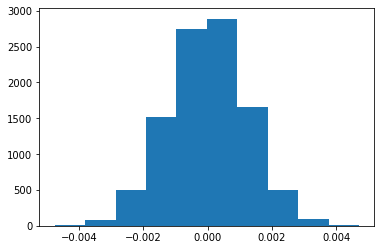

In [37]:
plt.hist(p_diffs);

**Discussion:**

This plot looks like what we expected. It has the shape of a normal distribution.
p_diffs contains 10,000 simulations of the difference in conversion rates p_new - p_old. The shape is something that we expected, due to the central limit theorem, which suggests that with large enough sample sizes
the sample mean (also the proportion, difference in means, difference in proportions)
will follow the normal distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
obs_diff = treatment_converted - control_converted

In [39]:
(p_diffs > obs_diff).mean()

0.9027

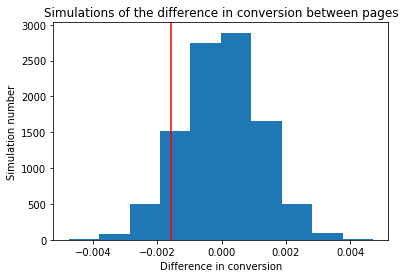

In [40]:
plt.hist(p_diffs);
plt.title("Simulations of the difference in conversion between pages");
plt.xlabel("Difference in conversion");
plt.ylabel("Simulation number");
plt.axvline(x=obs_diff, color='r');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

I have computed the p-value. The p-value is the probability of observing my statistic (or a more extreme in favor of the alternative) if the null hypothesis is true. Since my p-value is significant, about 0.9 (90%), this is far larger than the alpha (type I error rate) which is considered to be 5% in business or research cases. That means that we fail to reject the null hypothesis, since there is no significant evidence to suggest that the alternative hypothesis is true. Thus, we stay with the null which is the proportion of users converted with the old page is greater or equal to those converted with the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

convert_old = ((df2.group == 'control') & (df2.converted == 1)).sum()
convert_new = ((df2.group == 'treatment') & (df2.converted == 1)).sum()
n_old = (df2.group == 'control').sum()
n_new = (df2.group == 'treatment').sum()
n_old, n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

Indeed we see that the two p-values from the bootsraping and the stats.proportions_ztest are about 0.9.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

Since we need to predict only two possible outcomes - conversion or no conversion - we will use <i>logistic regression</i>.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
df2['intercept'] = 1
df2[['old_page', 'ab_page']] = pd.get_dummies(df2['group'])

C:\Users\pallasg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pallasg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [45]:
df2.drop(['old_page'], axis = 1, inplace = True)
df2.head()

C:\Users\pallasg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [46]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

In [47]:
res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Sep 2019   Pseudo R-squ.:               8.077e-06
Time:                        12:23:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** 

The p-value assossiated ab_page is 0.190 (or 19%), which is far bigger than a 5% alpha (type I error rate). That means we fail to reject the null hypothesis. The value differs with what I found in Part II. The reason is that in regression we have a two tail test. More specifically:

In Part II, my null and alternative hypothesis were:

H0: p_new - p_old <= 0

H1: p_new - p_old > 0

So, the null is that the difference in proportions of users who converted in the new page minus the users who converted in the old page is less or equal than zero.

In regression, p-values are given for testing if the parameters in the null hypothesis are equal to zero, while in the alternative hypothesis p-values are using a not-equal relationship. Thus, the null and alternative hypothesis in regression become:

H0: p_new - p_old = 0

H1: p_new - p_old <> 0

I can re-calculate the p-value from the bootstrap results in Part II to verify:

In [49]:
upper_lim = p_diffs.mean()-obs_diff

In [50]:
lower_lim = obs_diff

In [51]:
(p_diffs < lower_lim).mean() + (p_diffs > upper_lim).mean()
# indeed, we see that with a two tail p-value the result is similar to that of the statsmodel

0.1938

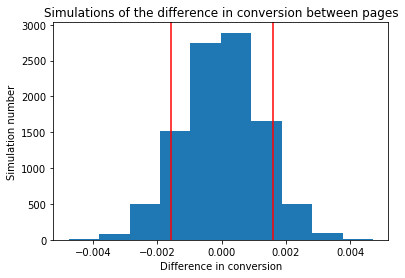

In [52]:
plt.hist(p_diffs);
plt.title("Simulations of the difference in conversion between pages");
plt.xlabel("Difference in conversion");
plt.ylabel("Simulation number");
plt.axvline(x=lower_lim, color='r');
plt.axvline(x=upper_lim, color='r');

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

In general, it might be a good idea to consider other factors in my regression model to see if a user converts or not. For example, I might consider higher order terms or interaction between two varibles. The advantage of that might be that these terms can fit more complex relationships in my data. The drawback is that the interpretation of the results becomes more difficult. Furthermore, if I consider more predictor variables I might increase the chance that these variables are correlated with each other. However, we want our predictor variables to be correlated with the response and not with each other in order to avoid issues that might be a result of multicollinearity. Finally, we can see in our dataset there is a timestamp variable. I could create a dummy variable for different times during the day and see if we can predtict if a user converted.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.

In [53]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [54]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 7 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
dtypes: int64(2), object(4), uint8(1)
memory usage: 15.8+ MB


In [56]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [57]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [58]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [59]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])

In [60]:
res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [61]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 Sep 2019   Pseudo R-squ.:               1.521e-05
Time:                        12:23:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [62]:
# We see again that the p-values (0.074 for UK and 0.129 for US) are above the aplha (0.05) rate.
# Thus, we fail to reject the null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [63]:
# create the columns for the interaction term between page and country
df_new['page_UK'] = df_new['ab_page'] * df_new['UK']
df_new['page_US'] = df_new['ab_page'] * df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page_UK,page_US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [64]:
# Adding higher order terms or interaction in the model, we should also add the lower order terms as well
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'page_UK', 'page_US']])

In [65]:
res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [66]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Sep 2019   Pseudo R-squ.:               3.482e-05
Time:                        12:23:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
page_US        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**Discussion:**

We can see for the p-values that are above the 0.05 alpha threshold, also for the interaction terms.
Thus, we fail to reject the null hypothesis.
Or alternatively we can say that the evidence provided from the interaction between country and page
is not sufficient to predict if a user has converted or not.

<a id='conclusions'></a>
## Conclusions


We saw in this project different ways to predict if the proportion of users that converted using a new webpage is higher or not compared to the proportion of users that converted using the old webpage.

First, we started by cleaning and exploring our data to see the percentage of users for the treatment and control groups that converted and also to see if the population of the two groups is balanced.

Then, we proceeded by setting up a hypothesis testing and defined our null and alternative hypothesis. We ran a sampling distribution for 10,000 simulations of the difference in proportion of the users from the treatment and control groups that converted using numpy random choice, which performs bootstrapping, and calculated the p-value. Moreover, we used an alternative method to achive the same outcome, from stats.proportions_ztest in order to calculate the p-value using the same parameters as in the sampling distribution.

Furthermore, we used logistic regression to predict if a user will convert or not given that he is using the old or the new webpage. We saw the difference in calculating the p-value between our initial hypothesis test (one sided) and the logistic regression (two sided).

Lastly, we included in the logistic regression model additional country predictor variables (categorical) in order to see if they can predict if the users converted - using both single terms and interaction terms in our model -.

In all cases, the p-values are higher than the alpha threshold (which is the type I error rate). That means that there is not sufficient evidence to support that by using the new webpage more users will convert, and thus we fail to reject the null hypothesis.